# Central limit theorem

The central limit theorem says that if we add up enough independent random vaiables, we end up with something that tends towards a normal distribution. 

https://en.wikipedia.org/wiki/Central_limit_theorem

## Adding up dice

A die is a pretty good real world illustration of a uniform random variable. Before throwing a die, all sides are equally likely to come up. However, when is has been thrown, only one value is shown. This can be compared to a random variable with an associated distribuiton and one realisation. 

Note that the probability in the plot sum to one but is distributed per outcome. Note to be confused with how a continous stochastic variable would be normalized. 

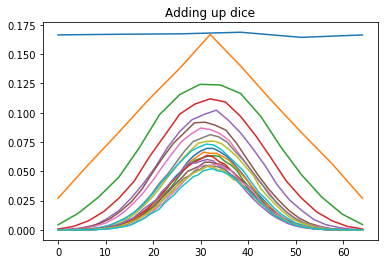

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n_samples = 100000

def adding_dice(n_samples, n_throws_per_sample, n_outcomes=6):
    throws = np.random.randint(low=1, high=n_outcomes+1, size=(n_samples, n_throws_per_sample))
    return np.sum(throws, axis=1)

def histogram(v):
    H = np.zeros(np.unique(v).shape)
    for i, e in enumerate(np.sort(np.unique(v))):
        H[i] = np.sum(v==e)
    H /= np.sum(H)
    return H

X = list()
for i in range(1, 21):
    X.append(adding_dice(n_samples, i))
H = [histogram(x) for x in X]
max_length = np.max([len(h) for h in H])

plt.figure()
for y in H:
    x = np.asarray(range(len(y)), dtype=np.float)
    x *= max_length/np.max(x)
    plt.plot(x, y)
plt.title("Adding up dice")
plt.show()

Let's compare the results of the added dice to a normal PDF.

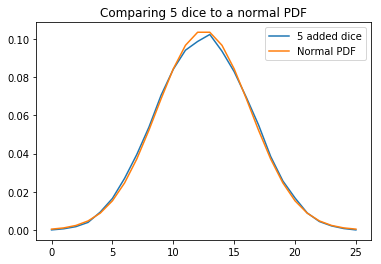

In [2]:
n_dice = 5

from scipy.stats import norm

plt.figure()
plt.title("Comparing %i dice to a normal PDF" % n_dice)
y = H[n_dice-1]
x = np.asarray(range(len(y)), dtype=np.float)
plt.plot(x, y, label="%i added dice" % n_dice)
plt.plot(x, norm.pdf(x, np.mean(x), np.sqrt(np.sum(y/np.sum(y)*((x-np.mean(x))**2)))), label='Normal PDF')
plt.legend()
plt.show()

## Beads



First, a population is created.

In [3]:
import numpy as np

n_population = 16000
population = np.zeros(n_population)
colours = ['white', 'red', 'blue', 'green', 'gray']
n_groups = len(colours)

for group in range(1, len(colours)):
    population[:n_population//(2**group)] = group

print("Group probabilities for a population with N=%i" % n_population)
for group in range(len(colours)):
    print("P(%s) = %.2f%%" % (colours[group], 100*np.sum(population==group)/population.shape[0]))

Group probabilities for a population with N=16000
P(white) = 50.00%
P(red) = 25.00%
P(blue) = 12.50%
P(green) = 6.25%
P(gray) = 6.25%


Let's do a poll and see what happens.

In [4]:
n_samples = 10000

S = np.random.choice(population, size=n_samples, replace=False)

print("Results from one poll with N=%i" % n_samples)
for group in range(len(colours)):
    print("P(%s) = %.2f%%" % (colours[group], 100*np.sum(S==group)/S.shape[0]))

Results from one poll with N=10000
P(white) = 49.75%
P(red) = 25.16%
P(blue) = 12.24%
P(green) = 6.42%
P(gray) = 6.43%


In [5]:
n_samples = 500
n_polls = 1000

S = np.zeros((n_polls, n_groups))
for i in range(n_polls):
    s = np.random.choice(population, size=n_samples, replace=False)
    for j in range(n_groups):
        S[i, j] = np.sum(s==j)/n_samples

print("Experimental mean values:", np.mean(S, axis=0))
#print(np.std(S, axis=0))
print("Experimental spread as percentile95-percentile5:", np.percentile(S, 95, axis=0) - np.percentile(S, 5, axis=0))

Experimental mean values: [0.501258 0.249814 0.125264 0.061804 0.06186 ]
Experimental spread as percentile95-percentile5: [0.072  0.0581 0.044  0.034  0.034 ]


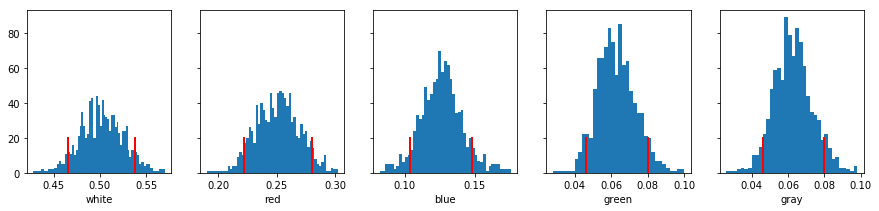

In [6]:
fig, ax = plt.subplots(1, 5, sharey='all', figsize=(15, 3))
for i in range(n_groups):
    ax[i].hist(S[:, i], np.unique(S[:, i]));
    for p in [5, 95]:
        ax[i].plot(np.percentile(S[:, i], p)*np.ones(2), [n_polls//50, 0], 'r-', linewidth=2)
    ax[i].set_xlabel(colours[i])

How is samples size and probability of a class related to the spread of the results?

In [7]:
n_samples = 1000
n_polls = 100

S = np.zeros((n_polls, n_groups))
for i in range(n_polls):
    s = np.random.choice(population, size=n_samples, replace=False)
    for j in range(n_groups):
        S[i, j] = np.sum(s==j)/n_samples

print(np.mean(S, axis=0))
print(np.std(S, axis=0))
print(np.percentile(S, 95, axis=0))
print(np.percentile(S, 5, axis=0))

[0.50135 0.24889 0.1252  0.06188 0.06268]
[0.01358115 0.01170717 0.01050524 0.00722396 0.00690055]
[0.526   0.26905 0.144   0.075   0.073  ]
[0.478   0.2339  0.11    0.05095 0.052  ]


Law of large numbers

Outcomes of X: [1 2 3 4 5 6]


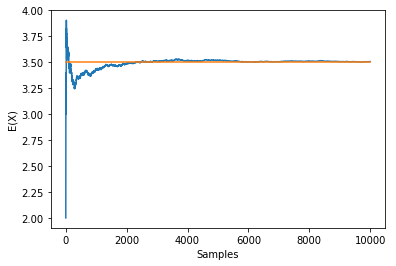

In [26]:
import numpy as np
X = np.random.randint(1, 7, size=10000)
print("Outcomes of X:", np.unique(X))

plt.figure()
plt.plot([np.mean(X[:i]) for i in range(2, len(X))], label="Simulated")
plt.plot([1, len(d)], [3.5, 3.5], label="Teoretical")
plt.xlabel("Samples")
plt.ylabel("E(X)")
plt.show()